<h3>Nonlinear regression with the linear model</h3>
<p>Start by loading the data</p>

In [8]:
import numpy as np
data = np.loadtxt('/Users/simon/git/fcmlcode/labs/linear_regression/data100m.csv',delimiter=',')
x = data[:,0][:,None]
t = data[:,1][:,None]

<h4>Rescaling $x$</h4>
<p>We re-scale the Olympic year value to help with numerical problems when we look at high orders. Satisfy yourself that this doesn't make any difference!</p>

In [9]:
x = (x-1896)/4

<h4>Creating $\mathbf{X}$</h4>
<p>We loop up to the desired order, adding columns to $\mathbf{X}$ at each stage</p>

In [28]:
maxorder = 1
X = np.ones_like(x)
for i in range(1,maxorder+1):
    X = np.hstack((X,x**i))

X = np.hstack((X,np.sin(x)))
print X

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   8.41470985e-01]
 [  1.00000000e+00   2.00000000e+00   9.09297427e-01]
 [  1.00000000e+00   2.50000000e+00   5.98472144e-01]
 [  1.00000000e+00   3.00000000e+00   1.41120008e-01]
 [  1.00000000e+00   4.00000000e+00  -7.56802495e-01]
 [  1.00000000e+00   6.00000000e+00  -2.79415498e-01]
 [  1.00000000e+00   7.00000000e+00   6.56986599e-01]
 [  1.00000000e+00   8.00000000e+00   9.89358247e-01]
 [  1.00000000e+00   9.00000000e+00   4.12118485e-01]
 [  1.00000000e+00   1.00000000e+01  -5.44021111e-01]
 [  1.00000000e+00   1.30000000e+01   4.20167037e-01]
 [  1.00000000e+00   1.40000000e+01   9.90607356e-01]
 [  1.00000000e+00   1.50000000e+01   6.50287840e-01]
 [  1.00000000e+00   1.60000000e+01  -2.87903317e-01]
 [  1.00000000e+00   1.70000000e+01  -9.61397492e-01]
 [  1.00000000e+00   1.80000000e+01  -7.50987247e-01]
 [  1.00000000e+00   1.90000000e+01   1.49877210e-01]
 [  1.00000000e+00   2.00000

<p>Solve the system...</p>

In [29]:
w = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,t))
print(w)

[[ 11.11334304]
 [ -0.05212027]
 [  0.0732786 ]]


Create a test set in the same manner as $\mathbf{X}$...

In [30]:
x_test = np.linspace(0,30,100)[:,None]
X_test = np.ones_like(x_test)
for i in range(1,maxorder+1):
    X_test = np.hstack((X_test,x_test**i))
X_test = np.hstack((X_test,np.sin(x_test)))
f_test = np.dot(X_test,w)

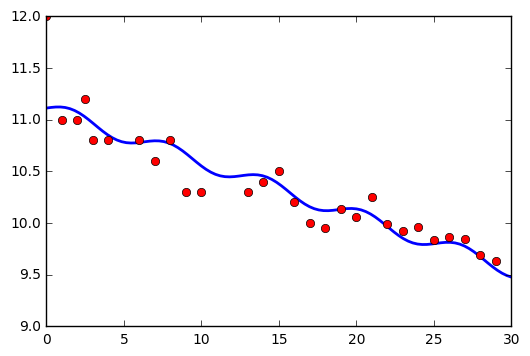

In [31]:
import pylab as plt
%matplotlib inline
plt.plot(x_test,f_test,'b-',linewidth=2)
plt.plot(x,t,'ro')

<p>Try playing with the maximum order and extending the test data range...</p>